# Function Fitting

### load data & set functions

In [1]:
import numpy as np
from scipy.optimize import curve_fit
from scipy.optimize import least_squares
import DC_Pickle as dcp
import Curve_Functions as cv
import matplotlib.pyplot as plt
%matplotlib inline

def curve_Fitting(func, x, y, name):
    fig, ax = plt.subplots(1, 1, figsize=(10,8))
    
    popt, pcov = curve_fit(func, x, y, maxfev = 1000000)
    print(" - Curve Fitting Parameters: \n{0}".format(popt))
    print(" - Curve Fitting Covariance: \n{0}".format(pcov))
    upper_bound = []
    lower_bound = []
    for i in range(len(pcov)):
        upper_bound.append(popt[i] + pcov[i,i])
        lower_bound.append(popt[i] - pcov[i,i])

    x_fit = np.linspace(0, 15, 100)
    if len(popt) == 1:
        y_mean = func(x_fit, popt[0])
        y_upper = func(x_fit, upper_bound[0])
        y_lower = func(x_fit, lower_bound[0])        
    
    elif len(popt) == 2:
        y_mean = func(x_fit, popt[0], popt[1])
        y_upper = func(x_fit, upper_bound[0], upper_bound[1])
        y_lower = func(x_fit, lower_bound[0], lower_bound[1])        
    
    elif len(popt) == 3:
        y_mean = func(x_fit, popt[0], popt[1], popt[2])
        y_upper = func(x_fit, upper_bound[0], upper_bound[1], upper_bound[2])
        y_lower = func(x_fit, lower_bound[0], lower_bound[1], lower_bound[2])

    elif len(popt == 4):
        y_mean = func(x_fit, popt[0], popt[1], popt[2], popt[3])
        y_upper = func(x_fit, upper_bound[0], upper_bound[1], upper_bound[2], upper_bound[3])
        y_lower = func(x_fit, lower_bound[0], lower_bound[1], lower_bound[2], upper_bound[3])

    ax.plot(x, y, 'rx')
    ax.plot(x_fit, y_mean, 'r-', label="curve fitting")    
    for i in range(len(x_fit)):
        if i == 0:
            ax.plot([x_fit[i], x_fit[i]], [y_lower[i], y_upper[i]], 'b-', label="variance")
        else:
            ax.plot([x_fit[i], x_fit[i]], [y_lower[i], y_upper[i]], 'b-')
    
    ax.set_ylim([0, max(y)+0.05])
    ax.legend()
    fig.savefig('Figs/{0}'.format(name, dpi=100))
    
    return popt, pcov

def disp_Data(x_axis, y_axis, colour_shape='b.', rows=1, columns=1, size=(10, 5)):
    fig, axes = plt.subplots(rows, columns, figsize=size)
    axes.plot(x_axis, y_axis, colour_shape)
    plt.show()

In [2]:
data_path = "../../data/pickles/clusters_test/centroid2.pickle"
train_data = dcp.open_Pickle(data_path)
train_data = train_data[:, :, 0]

attempts = np.arange(15)+1 # attempts
scores = train_data[0,:] # centroid of cluster 1

# disp_Data(attempts, scores)

### exponential fit

#### Two parameters

 - Least Square Parameters: [ 0.14980187 -0.04312138], Cost: 0.03736689479711762
 - Curve Fitting Parameters: 
[ 0.14980267 -0.04312082]
 - Curve Fitting Covariance: 
[[ 0.0011349   0.00066667]
 [ 0.00066667  0.0004652 ]]


(array([ 0.14980267, -0.04312082]), array([[ 0.0011349 ,  0.00066667],
        [ 0.00066667,  0.0004652 ]]))

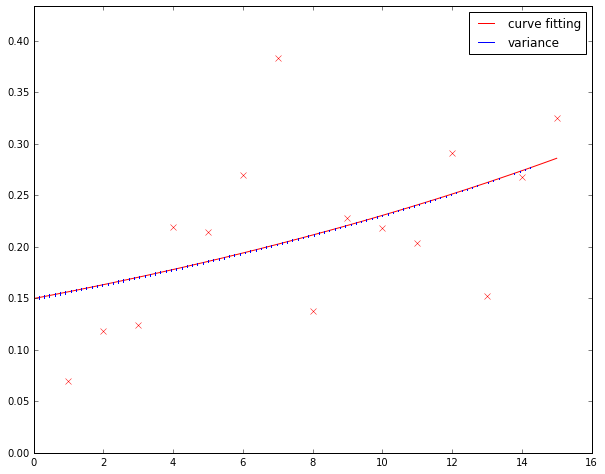

In [3]:
seed = np.array([1, 1])
exp2_lqe = least_squares(cv.exponential_least2, seed, args=(attempts, scores))
print(" - Least Square Parameters: {0}, Cost: {1}".format(exp2_lqe.x, exp2_lqe.cost))

curve_Fitting(cv.exponential_curve2, attempts, scores, 'Exp2')

#### Three parameters

Least Square Parameters: [-0.30827754  0.4626317   0.24977196], Cost: 0.028342201139793907
 - Curve Fitting Parameters: 
[-0.30827811  0.46263319  0.24977189]
 - Curve Fitting Covariance: 
[[ 0.0269252  -0.04416479  0.00109147]
 [-0.04416479  0.11639251 -0.00591084]
 [ 0.00109147 -0.00591084  0.00074548]]


(array([-0.30827811,  0.46263319,  0.24977189]),
 array([[ 0.0269252 , -0.04416479,  0.00109147],
        [-0.04416479,  0.11639251, -0.00591084],
        [ 0.00109147, -0.00591084,  0.00074548]]))

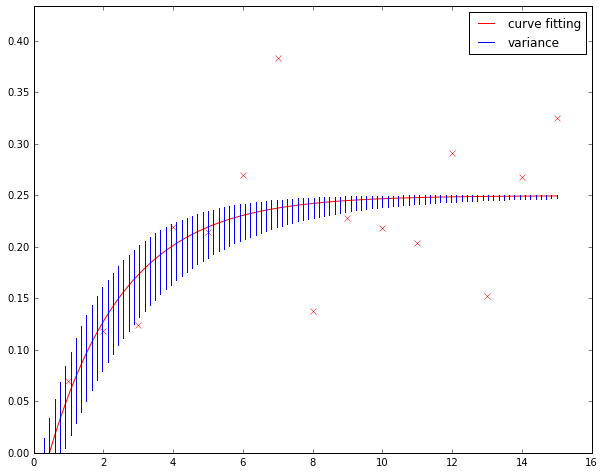

In [4]:
seed = np.array([1, 1, 1])
exp3_lqe = least_squares(cv.exponential_least3, seed, args=(attempts, scores))
print("Least Square Parameters: {0}, Cost: {1}".format(exp3_lqe.x, exp3_lqe.cost))

curve_Fitting(cv.exponential_curve3, attempts, scores, 'Exp3')

### polynoimial fit

Least Square Parameters: [ 0.13418852  0.01008499], Cost: 0.0361757985494206
 - Curve Fitting Parameters: 
[ 0.13418852  0.01008499]
 - Curve Fitting Covariance: 
[[  1.64314984e-03  -1.59014499e-04]
 [ -1.59014499e-04   1.98768122e-05]]


(array([ 0.13418852,  0.01008499]),
 array([[  1.64314984e-03,  -1.59014499e-04],
        [ -1.59014499e-04,   1.98768122e-05]]))

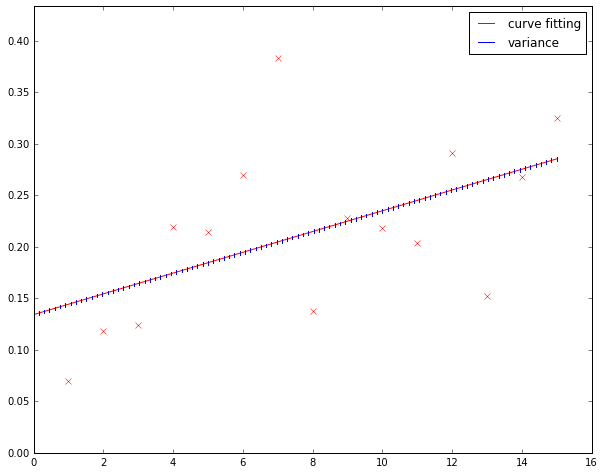

In [5]:
seed = np.array([1, 1])
poly_lqe = least_squares(cv.polynomial_least, seed, args=(attempts, scores))
print("Least Square Parameters: {0}, Cost: {1}".format(poly_lqe.x, poly_lqe.cost))

curve_Fitting(cv.polynomial_curve, attempts, scores, 'Poly1')

### power law fit

#### Two parameters

Least Square Parameters: [-0.11538004 -0.32126806], Cost: 0.03233013907518448
 - Curve Fitting Parameters: 
[-0.11537829 -0.32127514]
 - Curve Fitting Covariance: 
[[ 0.00136655 -0.0051584 ]
 [-0.0051584   0.02085899]]


(array([-0.11537829, -0.32127514]), array([[ 0.00136655, -0.0051584 ],
        [-0.0051584 ,  0.02085899]]))

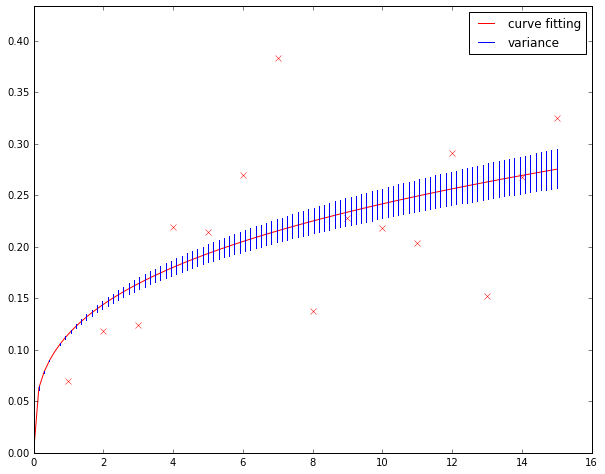

In [6]:
seed = np.array([1, 1])
pl2_lqe = least_squares(cv.powerlaw_least2, seed, args=(attempts, scores))
print("Least Square Parameters: {0}, Cost: {1}".format(pl2_lqe.x, pl2_lqe.cost))

curve_Fitting(cv.powerlaw_curve2, attempts, scores, 'power2')

#### Thress parameters

Least Square Parameters: [ 0.25846093  0.56165838  0.31564167], Cost: 0.02931644297767546
 - Curve Fitting Parameters: 
[ 0.25846093  0.56165843  0.31564166]
 - Curve Fitting Covariance: 
[[ 0.02935629 -0.12509732  0.03003498]
 [-0.12509732  0.72391854 -0.15633817]
 [ 0.03003498 -0.15633817  0.03526632]]


(array([ 0.25846093,  0.56165843,  0.31564166]),
 array([[ 0.02935629, -0.12509732,  0.03003498],
        [-0.12509732,  0.72391854, -0.15633817],
        [ 0.03003498, -0.15633817,  0.03526632]]))

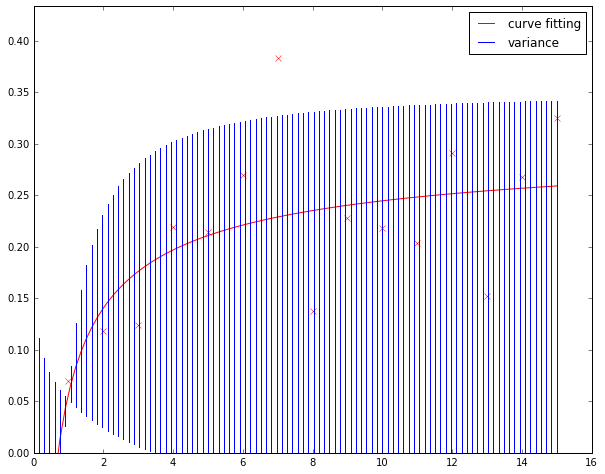

In [7]:
seed = np.array([1, 1, 1])
pl3_lqe = least_squares(cv.powerlaw_least3, seed, args=(attempts, scores))
print("Least Square Parameters: {0}, Cost: {1}".format(pl3_lqe.x, pl3_lqe.cost))

curve_Fitting(cv.powerlaw_curve3, attempts, scores, 'power3')

#### Four parameters

Least Square Parameters: [  1.43010181e+09   8.03743959e+00   2.52953415e-01   1.58673816e+01], Cost: 0.028499645659326816
 - Curve Fitting Parameters: 
[  2.29654358e+158   7.25125495e+001   2.50095879e-001   1.55215601e+002]
 - Curve Fitting Covariance: 
[[              inf               nan               nan               inf]
 [  5.79403916e+163   4.19703224e+004  -3.17647992e-001   8.99435473e+004]
 [ -1.99118220e+158  -3.17647992e-001   8.34567453e-004   1.57231098e+000]
 [  1.25732860e+164   8.99435473e+004   1.57231097e+000   2.07538408e+005]]


(array([  2.29654358e+158,   7.25125495e+001,   2.50095879e-001,
          1.55215601e+002]),
 array([[              inf,               nan,               nan,
                       inf],
        [  5.79403916e+163,   4.19703224e+004,  -3.17647992e-001,
           8.99435473e+004],
        [ -1.99118220e+158,  -3.17647992e-001,   8.34567453e-004,
           1.57231098e+000],
        [  1.25732860e+164,   8.99435473e+004,   1.57231097e+000,
           2.07538408e+005]]))

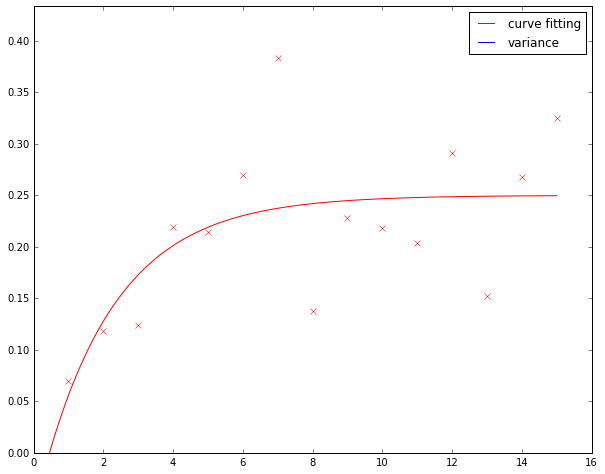

In [8]:
seed = np.array([1, 1, 1, 1])
pl4_lqe = least_squares(cv.powerlaw_least4, seed, args=(attempts, scores))
print("Least Square Parameters: {0}, Cost: {1}".format(pl4_lqe.x, pl4_lqe.cost))

curve_Fitting(cv.powerlaw_curve4, attempts, scores, 'power4')